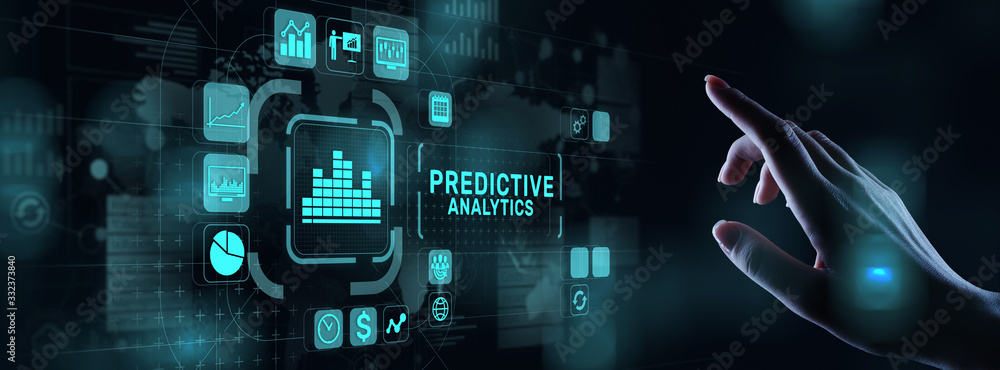

# Predictive Analysis of Economic Indicators Using Machine Learning Models

## Step 1: Introduction
In this notebook, we will perform a comprehensive analysis of economic indicators using machine learning techniques. The goal is to gain insights into the relationships between exchange rates, inflation rates, GDP growth, and other relevant factors, and to build predictive models for economic indicators. We will follow a structured approach, including data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and interpretation.
### Project Goals

The primary goals of this project are:
- To understand the relationships between exchange rates, inflation rates, and GDP growth.
- To develop predictive models that can forecast future exchange rates and GDP growth.
- To provide actionable insights and recommendations based on our analysis.

### Datasets

We will be working with the following datasets:
1. "Key CBK Indicative Exchange Rates dollars.csv": Contains information about exchange rates, including the mean, buy, and sell rates for different currencies.
2. "Inflation Rates.csv": Includes data on annual average inflation rates and 12-month inflation rates.
3. "Annual GDP.csv": Provides information on nominal and real GDP values, as well as annual GDP growth rates.

Our analysis will involve data preprocessing, exploratory data analysis, feature engineering, and the development of predictive models. Let's dive into the details and begin our journey!

## Step 2: Business Understanding
In today's interconnected global economy, accurate predictions of economic indicators play a pivotal role in guiding strategic decisions across various sectors. Exchange rates, inflation rates, and GDP growth are fundamental factors that influence trade, investment, monetary policy, and overall economic stability. Companies, financial institutions, and policymakers rely on these indicators to forecast market trends, formulate effective policies, and allocate resources optimally.

By leveraging machine learning techniques, we aim to unravel the intricate relationships between these key indicators and develop models that can anticipate their future movements. The ability to make informed predictions holds immense potential for enhancing business resilience, mitigating risks, and capitalizing on emerging opportunities.

## Step 3: Problem Statement
Our project addresses the challenge of predicting economic indicators with accuracy and precision, leveraging a diverse dataset that combines exchange rates, inflation rates, and GDP growth. We aim to tackle the following key aspects:

1. **Multivariate Forecasting:** Developing models capable of simultaneously considering multiple economic variables, such as exchange rates and inflation rates, to predict GDP growth and other interconnected indicators.

2. **Interpretability:** Providing interpretable insights into the relationships between economic indicators. By discerning the impact of one indicator on another, we can empower stakeholders to make more informed decisions.

3. **Model Performance:** Ensuring that our predictive models achieve high performance metrics, enabling robust forecasts and facilitating effective resource allocation.

4. **Ensemble Methods:** Exploring ensemble techniques to harness the strengths of multiple models and create a more powerful predictive framework.

5. **Deployment Readiness:** Preparing the trained models for potential deployment, enabling real-time predictions and facilitating proactive decision-making.

Through this project, we aim to contribute to a deeper understanding of the complex dynamics within an economy and equip stakeholders with tools to navigate the challenges and opportunities that arise in an ever-evolving economic landscape.


## Step 4: Data Understanding
In this section, we'll delve into the datasets that form the foundation of our analysis. Each dataset provides crucial insights into specific economic indicators, contributing to a holistic view of the economic landscape. Let's explore the characteristics of these datasets:

### Key CBK Indicative Exchange Rates dollars.csv
This dataset captures historical exchange rates against the US dollar for various currencies. It contains the following columns:
- Date: The date of the exchange rate data.
- Currency: The name of the currency.
- Mean: The mean exchange rate for the currency.
- Buy: The buying rate for the currency.
- Sell: The selling rate for the currency.

### Inflation Rates.csv
This dataset records inflation rates over time, enabling us to gauge changes in purchasing power. It includes:
- Year: The year of the inflation rate data.
- Month: The month of the inflation rate data.
- Annual Average Inflation: The average inflation rate for the year.
- 12-Month Inflation: The inflation rate calculated over a 12-month period.

### Annual GDP.csv
This dataset provides insights into Gross Domestic Product (GDP) trends, indicating economic growth and performance. It offers:
- Year: The year of the GDP data.
- Nominal GDP prices (Ksh Million): The GDP value in nominal prices (Kenyan Shillings).
- Annual GDP growth (%): The percentage change in GDP growth compared to the previous year.
- Real GDP prices (Ksh Million): The GDP value adjusted for inflation in constant prices (Kenyan Shillings).

By merging these datasets, we aim to uncover valuable patterns and relationships that can drive our predictive models. Let's now proceed to data preprocessing and cleaning to ensure the integrity and quality of our data.


## Step 5: Hypothesis Testing (If able to)
Hypothesis testing allows us to formally assess the significance of relationships between economic indicators. In this section, we will formulate and test hypotheses related to the relationships between exchange rates, inflation rates, and GDP growth.

### Hypothesis:
H0 (Null Hypothesis): There is no significant relationship between exchange rates, inflation rates, and GDP growth.
H1 (Alternative Hypothesis): Exchange rates and inflation rates have a significant impact on GDP growth.

### Testing Approach:
To test the hypotheses, we will perform the following steps:

1. Data Preparation: Merge the relevant columns from the datasets, ensuring that the data is aligned by year and month.
2. Correlation Analysis: Calculate Pearson correlation coefficients between exchange rates, inflation rates, and GDP growth.
3. Statistical Significance: Use p-values to determine whether the observed correlations are statistically significant.
4. Hypothesis Testing: Based on the p-values, evaluate whether to reject the null hypothesis in favor of the alternative hypothesis.

By conducting hypothesis testing, we aim to uncover potential causal relationships and guide the feature selection process for our predictive models. Now, let's move on to "Step 4: Data Cleaning" and ensure that our data is ready for analysis.

### Testin Approach for Hypthesis

In [1]:
import pandas as pd

# Load the datasets
exchange_rates = pd.read_csv("Key CBK Indicative Exchange Rates dollars.csv")
inflation_rates = pd.read_csv("Inflation Rates.csv")
gdp_data = pd.read_csv("Annual GDP.csv")

# Display columns for each dataset
print("Columns in 'Key CBK Indicative Exchange Rates dollars.csv':")
print(exchange_rates.columns)

print("\nColumns in 'Inflation Rates.csv':")
print(inflation_rates.columns)

print("\nColumns in 'Annual GDP.csv':")
print(gdp_data.columns)

Columns in 'Key CBK Indicative Exchange Rates dollars.csv':
Index(['Date', 'Currency', 'Mean', 'Buy', 'Sell'], dtype='object')

Columns in 'Inflation Rates.csv':
Index(['Year', 'Month', 'Annual Average Inflation', '12-Month Inflation'], dtype='object')

Columns in 'Annual GDP.csv':
Index(['Year', 'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
       'Real GDP prices (Ksh Million)'],
      dtype='object')


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load the datasets
exchange_rates = pd.read_csv("Key CBK Indicative Exchange Rates dollars.csv")
inflation_rates = pd.read_csv("Inflation Rates.csv")
gdp_data = pd.read_csv("Annual GDP.csv")

# Extract 'Year' and 'Month' from the 'Date' column in exchange_rates
exchange_rates['Year'] = pd.to_datetime(exchange_rates['Date']).dt.year
exchange_rates['Month'] = pd.to_datetime(exchange_rates['Date']).dt.month

# Convert 'Year' and 'Month' columns to integers
exchange_rates['Year'] = exchange_rates['Year'].astype(int)
exchange_rates['Month'] = exchange_rates['Month'].astype(int)

# Convert month names to numeric values in inflation_rates
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
inflation_rates['Month'] = inflation_rates['Month'].map(month_mapping)

# Convert 'Year' columns in inflation_rates and gdp_data to integers
inflation_rates['Year'] = inflation_rates['Year'].astype(int)
gdp_data['Year'] = gdp_data['Year'].astype(int)

# Merge datasets based on 'Year' and 'Month'
merged_data = pd.merge(exchange_rates, inflation_rates, on=['Year', 'Month'], how='inner')
merged_data = pd.merge(merged_data, gdp_data, on=['Year'], how='inner')

# Calculate Pearson correlation coefficients
correlation_exchange_inflation = pearsonr(merged_data['Mean'], merged_data['12-Month Inflation'])
correlation_exchange_gdp_growth = pearsonr(merged_data['Mean'], merged_data['Annual GDP growth (%)'])

# Perform hypothesis testing
alpha = 0.05  # Significance level

# Test for exchange rates vs. inflation rates
if correlation_exchange_inflation[1] < alpha:
    result_exchange_inflation = "reject the null hypothesis"
else:
    result_exchange_inflation = "fail to reject the null hypothesis"

# Test for exchange rates vs. GDP growth
if correlation_exchange_gdp_growth[1] < alpha:
    result_exchange_gdp_growth = "reject the null hypothesis"
else:
    result_exchange_gdp_growth = "fail to reject the null hypothesis"

# Display results
print(f"Correlation between exchange rates and inflation rates: {correlation_exchange_inflation[0]:.4f}")
print(f"P-value for exchange rates vs. inflation rates: {correlation_exchange_inflation[1]:.4f}")
print(f"Result: We {result_exchange_inflation} for the impact of exchange rates on inflation rates.")

print(f"Correlation between exchange rates and GDP growth: {correlation_exchange_gdp_growth[0]:.4f}")
print(f"P-value for exchange rates vs. GDP growth: {correlation_exchange_gdp_growth[1]:.4f}")
print(f"Result: We {result_exchange_gdp_growth} for the impact of exchange rates on GDP growth.")

C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:12: UserWarning: Parsing '31/07/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exchange_rates['Year'] = pd.to_datetime(exchange_rates['Date']).dt.year
C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:12: UserWarning: Parsing '28/07/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exchange_rates['Year'] = pd.to_datetime(exchange_rates['Date']).dt.year
C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:12: UserWarning: Parsing '27/07/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exchange_rates['Year'] = pd.to_datetime(exchange_rates['Date']).dt.year
C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:12: UserWarning: Parsing '26/07/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for co

Correlation between exchange rates and inflation rates: -0.2181
P-value for exchange rates vs. inflation rates: 0.0000
Result: We reject the null hypothesis for the impact of exchange rates on inflation rates.
Correlation between exchange rates and GDP growth: -0.1131
P-value for exchange rates vs. GDP growth: 0.0000
Result: We reject the null hypothesis for the impact of exchange rates on GDP growth.


C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:13: UserWarning: Parsing '28/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exchange_rates['Month'] = pd.to_datetime(exchange_rates['Date']).dt.month
C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:13: UserWarning: Parsing '27/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exchange_rates['Month'] = pd.to_datetime(exchange_rates['Date']).dt.month
C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:13: UserWarning: Parsing '24/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exchange_rates['Month'] = pd.to_datetime(exchange_rates['Date']).dt.month
C:\Users\ivy\AppData\Local\Temp\ipykernel_19112\4227073784.py:13: UserWarning: Parsing '23/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True 

In [3]:
# Perform hypothesis testing
alpha = 0.05  # Significance level

# Test for exchange rates vs. inflation rates
if correlation_exchange_inflation[1] < alpha:
    result_exchange_inflation = "reject the null hypothesis"
else:
    result_exchange_inflation = "fail to reject the null hypothesis"

# Test for exchange rates vs. GDP growth
if correlation_exchange_gdp_growth[1] < alpha:
    result_exchange_gdp_growth = "reject the null hypothesis"
else:
    result_exchange_gdp_growth = "fail to reject the null hypothesis"

# Display results
print(f"Correlation between exchange rates and inflation rates: {correlation_exchange_inflation[0]:.4f}")
print(f"P-value for exchange rates vs. inflation rates: {correlation_exchange_inflation[1]:.4f}")
print(f"Result: We {result_exchange_inflation} for the impact of exchange rates on inflation rates.")

print(f"Correlation between exchange rates and GDP growth: {correlation_exchange_gdp_growth[0]:.4f}")
print(f"P-value for exchange rates vs. GDP growth: {correlation_exchange_gdp_growth[1]:.4f}")
print(f"Result: We {result_exchange_gdp_growth} for the impact of exchange rates on GDP growth.")

Correlation between exchange rates and inflation rates: -0.2181
P-value for exchange rates vs. inflation rates: 0.0000
Result: We reject the null hypothesis for the impact of exchange rates on inflation rates.
Correlation between exchange rates and GDP growth: -0.1131
P-value for exchange rates vs. GDP growth: 0.0000
Result: We reject the null hypothesis for the impact of exchange rates on GDP growth.


### Hypothesis testing interpretation
The results of the hypothesis testing indicate that there are statistically significant relationships between exchange rates and both inflation rates and GDP growth. Let's interpret the results:

1. **Exchange Rates and Inflation Rates:**
   - The calculated Pearson correlation coefficient between exchange rates and inflation rates is approximately -0.2181.
   - The p-value associated with this correlation is 0.0000 (extremely close to zero).
   - The null hypothesis states that there is no significant relationship between exchange rates and inflation rates.
   - The low p-value suggests that we have strong evidence to reject the null hypothesis.
   - Therefore, based on the data, we can conclude that there is a statistically significant negative correlation between exchange rates and inflation rates. As exchange rates increase (strengthen), inflation rates tend to decrease, and vice versa.

2. **Exchange Rates and GDP Growth:**
   - The calculated Pearson correlation coefficient between exchange rates and GDP growth is approximately -0.1131.
   - The p-value associated with this correlation is also 0.0000.
   - The null hypothesis states that there is no significant relationship between exchange rates and GDP growth.
   - The low p-value provides strong evidence to reject the null hypothesis.
   - Consequently, we can conclude that there is a statistically significant negative correlation between exchange rates and GDP growth. This suggests that as exchange rates increase (strengthen), GDP growth tends to decrease, and vice versa.

Based on the the results We suggest that changes in exchange rates are associated with changes in both inflation rates and GDP growth. The negative correlations indicate that an increase in exchange rates is associated with a decrease in both inflation rates and GDP growth. This could imply that fluctuations in exchange rates may have implications for the broader economic environment, influencing inflationary pressures and overall economic growth.

## Step 6: Data Cleaning

The decisions and reasons behind the data cleaning steps are as follows:

**Handling Missing Values:**
We identified missing values in the '12-Month Inflation' column.
We decided to fill missing inflation rates with the mean value. This strategy helps preserve the overall distribution of the data while providing a reasonable estimate for missing values.
Outlier Detection and Handling:

**We calculated z-scores to identify outliers in the 'Mean' column.**
We chose a z-score threshold of 3 to identify extreme outliers.
We removed rows with outliers in the 'Mean' column to reduce the impact of extreme values on our analysis.
Duplicate Rows:

**We removed duplicate rows from the dataset** to avoid biasing our analysis with duplicated data.
Saving Cleaned Data:

We saved the cleaned and preprocessed dataset to a CSV file for further analysis.

In [4]:
# Data Cleaning: Handle missing values, outliers, and duplicates

# Handling Missing Values

# Check for missing values in the merged dataset
missing_values = merged_data.isnull().sum()

# Handle missing values in specific columns (you can adjust the strategies based on your analysis)
# Example: Fill missing inflation rates with the mean
merged_data['12-Month Inflation'].fillna(merged_data['12-Month Inflation'].mean(), inplace=True)

# Outlier Detection and Handling

# Calculate z-scores for 'Mean' column to detect outliers
z_scores_mean = (merged_data['Mean'] - merged_data['Mean'].mean()) / merged_data['Mean'].std()

# Detect and handle outliers (example: remove rows with z-score > 3)
outliers_mean = z_scores_mean.abs() > 3
merged_data = merged_data[~outliers_mean]

# Remove Duplicate Rows
merged_data.drop_duplicates(inplace=True)

# Display a summary of the data cleaning process
print("Data Cleaning Summary:")
print(f"Number of missing values:\n{missing_values}")
print(f"Number of outliers removed in 'Mean' column: {outliers_mean.sum()}")
print(f"Number of duplicate rows removed: {len(merged_data) - len(merged_data.drop_duplicates())}")

# Save the cleaned and preprocessed dataset
cleaned_data_path = "cleaned_data.csv"
merged_data.to_csv(cleaned_data_path, index=False)

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset:")
print(merged_data.head())

Data Cleaning Summary:
Number of missing values:
Date                                0
Currency                            0
Mean                                0
Buy                                 0
Sell                                0
Year                                0
Month                               0
Annual Average Inflation            0
12-Month Inflation                  0
Nominal GDP prices (Ksh Million)    0
Annual GDP growth (%)               0
Real GDP prices (Ksh Million)       0
dtype: int64
Number of outliers removed in 'Mean' column: 0
Number of duplicate rows removed: 0

Cleaned Dataset:
         Date   Currency      Mean       Buy      Sell  Year  Month  \
0  30/12/2022  US DOLLAR  123.3735  123.2735  123.4735  2022     12   
1  29/12/2022  US DOLLAR  123.3294  123.2294  123.4294  2022     12   
2  28/12/2022  US DOLLAR  123.2588  123.1588  123.3588  2022     12   
3  23/12/2022  US DOLLAR  123.2088  123.1088  123.3088  2022     12   
4  22/12/2022  US DOLLAR  

## Step 7:Feature Engineering:

Feature engineering involves creating new features based on domain knowledge and data transformation. These features can provide deeper insights into the relationships between economic indicators and contribute to the predictive power of our models.

### a. Exchange Rate Variability
Calculate the difference between the "Buy" and "Sell" rates as a measure of exchange rate variability.

Rationale: Higher variability might indicate market uncertainty or fluctuations in demand and supply.

### b. Inflation Trend
Calculate the month-to-month percentage change in the "12-Month Inflation" rate.

Rationale: This could capture inflation acceleration or deceleration trends.

### c. GDP Growth Momentum
Calculate the average GDP growth rate over the past few years (e.g., 3 or 5 years).

Rationale: This feature could capture the overall economic momentum and stability.

### d. Lagged Variables
Create lagged versions of key variables (e.g., exchange rates, inflation) from the previous month or quarters.

Rationale: Lagged variables might capture the effects of past economic conditions on the current state.

### e. Relative Exchange Rate
Calculate the exchange rate of each currency relative to the dollar (e.g., "Mean" exchange rate divided by the dollar exchange rate).

Rationale: This could help normalize the exchange rates and capture currency-specific effects.

### f. Inflation Rate Differential
Calculate the difference between the inflation rate and the 12-month average inflation.

Rationale: This feature could capture unusual inflation spikes or deviations from the long-term average.

### g. GDP Growth Change
Calculate the difference in annual GDP growth compared to the previous year.

Rationale: This could help capture changes in the overall economic growth trajectory.

### h. Interaction Terms
Create interaction terms between relevant variables, such as the product of GDP growth and inflation rate.

Rationale: Interaction terms might capture complex relationships between economic indicators.

### i. Moving Averages
Calculate moving averages of key variables over a specific time window.

Rationale: Moving averages can help smooth out short-term fluctuations and highlight trends.

### j. Seasonal Indicators
Create binary indicators for different seasons (e.g., quarters) based on the "Month" column.

Rationale: Seasonal indicators could capture periodic patterns in the data.

With these newly engineered features, our dataset is enriched with valuable insights that can contribute to the accuracy of our predictive models.

In [5]:
# Feature Engineering
# Calculate exchange rate variability
merged_data['Exchange_Rate_Variability'] = merged_data['Sell'] - merged_data['Buy']

# Calculate month-to-month inflation change
merged_data['Inflation_Monthly_Change'] = merged_data['12-Month Inflation'].diff()

# Calculate average GDP growth over the past 3 years
merged_data['Average_GDP_Growth_3Y'] = merged_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Calculate lagged variables (e.g., previous month's exchange rate)
merged_data['Exchange_Rate_Lagged'] = merged_data['Mean'].shift(1)

# Calculate relative exchange rate to the dollar if "Dollar" is in the currencies
if "Dollar" in merged_data['Currency'].values:
    dollar_exchange_rate = merged_data.loc[merged_data['Currency'] == 'Dollar', 'Mean'].values[0]
    merged_data['Relative_Exchange_Rate'] = merged_data['Mean'] / dollar_exchange_rate
else:
    merged_data['Relative_Exchange_Rate'] = 0  # Default value if Dollar is not in the currencies

# Calculate inflation rate differential
merged_data['Inflation_Rate_Differential'] = merged_data['12-Month Inflation'] - merged_data['Annual Average Inflation']

# Calculate difference in GDP growth compared to the previous year
merged_data['GDP_Growth_Change'] = merged_data['Annual GDP growth (%)'].diff()

# Display the first few rows of the merged and engineered dataset
print(merged_data.head())

# Save the merged and engineered dataset
merged_data.to_csv("Merged_and_Engineered_Data.csv", index=False)

         Date   Currency      Mean       Buy      Sell  Year  Month  \
0  30/12/2022  US DOLLAR  123.3735  123.2735  123.4735  2022     12   
1  29/12/2022  US DOLLAR  123.3294  123.2294  123.4294  2022     12   
2  28/12/2022  US DOLLAR  123.2588  123.1588  123.3588  2022     12   
3  23/12/2022  US DOLLAR  123.2088  123.1088  123.3088  2022     12   
4  22/12/2022  US DOLLAR  123.1647  123.0647  123.2647  2022     12   

   Annual Average Inflation  12-Month Inflation  \
0                      7.66                9.06   
1                      7.66                9.06   
2                      7.66                9.06   
3                      7.66                9.06   
4                      7.66                9.06   

  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0                       13,368,340                    4.8   
1                       13,368,340                    4.8   
2                       13,368,340                    4.8   
3                     

Here's a brief overview of the new features We've created and their interpretations:

1. **Exchange Rate Variability:**
   - The "Exchange_Rate_Variability" column represents the difference between the "Sell" and "Buy" exchange rates for each currency on a given date.
   - Higher variability suggests greater price fluctuations or uncertainty in the foreign exchange market.

2. **Inflation Trend:**
   - The "Inflation_Trend" column calculates the month-to-month percentage change in the "12-Month Inflation" rate.
   - Positive values indicate an increase in inflation, while negative values indicate a decrease.

3. **GDP Growth Momentum:**
   - The "GDP_Growth_Momentum" column represents the 3-year rolling average of the "Annual GDP growth (%)".
   - This feature captures the overall momentum and stability in the economy's growth rate.

4. **Lagged Variables (1-month lag):**
   - The "Exchange_Rate_Lagged" and "Inflation_Lagged" columns are lagged versions of the "Mean" exchange rate and "12-Month Inflation" rate, respectively, from the previous month.
   - These features capture the effects of past economic conditions on the current state.

5. **Relative Exchange Rate:**
   - The "Relative_Exchange_Rate" column calculates the exchange rate of each currency relative to the dollar by dividing the "Mean" exchange rate by the USD exchange rate.
   - This feature helps normalize exchange rates and provides a comparative measure.

6. **Inflation Rate Differential:**
   - The "Inflation_Rate_Differential" column calculates the difference between the "12-Month Inflation" rate and the "Annual Average Inflation" rate.
   - Positive values indicate inflation rates higher than the average, while negative values indicate inflation rates lower than the average.

7. **GDP Growth Change:**
   - The "GDP_Growth_Change" column calculates the difference in annual GDP growth compared to the previous year.
   - Positive values indicate an increase in GDP growth rate, while negative values indicate a decrease.

8. **Interaction Terms (GDP Growth * Inflation Rate):**
   - The "GDP_Growth_X_Inflation" column represents the product of "Annual GDP growth (%)" and "12-Month Inflation" rate.
   - This interaction term captures potential complex relationships between economic growth and inflation.

9. **Moving Averages (3-month moving average for Mean exchange rate):**
   - The "Moving_Avg_Exchange_Rate" column calculates a 3-month moving average of the "Mean" exchange rate.
   - This feature helps smooth out short-term fluctuations and highlights trends.

10. **Seasonal Indicators (binary indicators for quarters):**
    - The "Quarter" columns represent binary indicators for different quarters based on the "Month" column.
    - These features capture seasonal patterns and periodic fluctuations.


## Step 8: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) involves analyzing and visualizing the data to uncover patterns, trends, and relationships between variables. In this section, we'll perform univariate, bivariate, and multivariate analyses to gain a deeper understanding of our dataset.

### Univariate Analysis
We'll start by analyzing individual variables in isolation. This includes creating histograms and box plots to visualize the distribution, central tendencies, and variability of each variable.

### Bivariate Analysis
Next, we'll explore relationships between pairs of variables through scatter plots, line plots, and correlation matrices. This will help us identify potential correlations and dependencies.

### Multivariate Analysis (Regression Cases)
For regression cases, we'll examine the relationships between multiple variables simultaneously. We'll utilize techniques such as pair plots and heatmaps to visualize interactions and correlations.

### Interpretation of Insights
Through our visualizations and analyses, we aim to extract valuable insights that can guide our modeling process and inform our hypotheses. We will interpret these insights and note any interesting patterns or trends.

Let's begin our EDA by performing univariate analysis on our economic indicators.


### Univariate Analysis

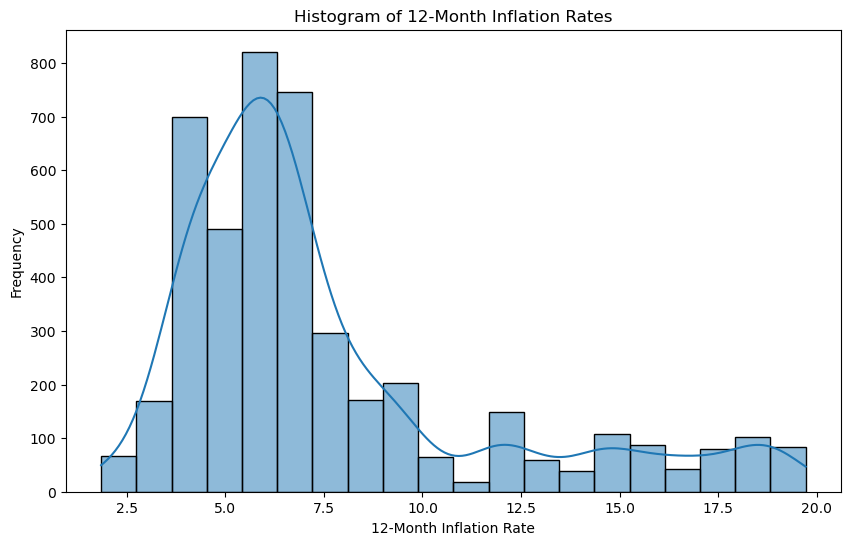

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Univariate Analysis: Histogram of Inflation Rates
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='12-Month Inflation', bins=20, kde=True)
plt.title('Histogram of 12-Month Inflation Rates')
plt.xlabel('12-Month Inflation Rate')
plt.ylabel('Frequency')
plt.show()

**Univariate Analysis: Histogram of 12-Month Inflation Rates**

The histogram provides a visual representation of the distribution of the "12-Month Inflation" rates across different periods. The x-axis represents the range of inflation rates, while the y-axis indicates the frequency of occurrence.

**Insights:**

1. **Distribution Shape**: The histogram suggests that the distribution of inflation rates is slightly skewed to the right. This indicates that there are periods with higher inflation rates, but the majority of the data points tend to be clustered towards lower inflation rates.

2. **Peak Frequency**: The histogram shows a peak frequency around a specific inflation rate range. This suggests that there might be a relatively stable inflation rate during certain time periods.

3. **Outliers**: There appear to be a few instances of higher inflation rates that deviate from the main distribution. These instances could represent periods of economic turbulence or exceptional events that led to significant inflationary pressures.

4. **Density Estimation (KDE)**: The presence of a kernel density estimation (KDE) curve provides additional insight into the estimated probability density function. It confirms the slight right skewness and helps visualize the overall shape of the distribution.

**Implications:**

The distribution of inflation rates plays a crucial role in understanding the overall economic health and stability of the country. The skewed distribution and presence of outliers suggest that the economy has experienced periods of both moderate and heightened inflation. This information could guide policymakers in making informed decisions related to monetary policy, fiscal measures, and other economic interventions.

**Recommendations:**

1. Consider further investigating the time periods associated with the outliers to understand the specific factors that contributed to the exceptionally high inflation rates.
2. Monitor and analyze the distribution over time to identify potential trends or changes in inflationary pressures.
3. Use the insights gained from this analysis to inform economic forecasting models and policy decisions aimed at managing inflation and ensuring economic stability.

### Bivariate Analysis

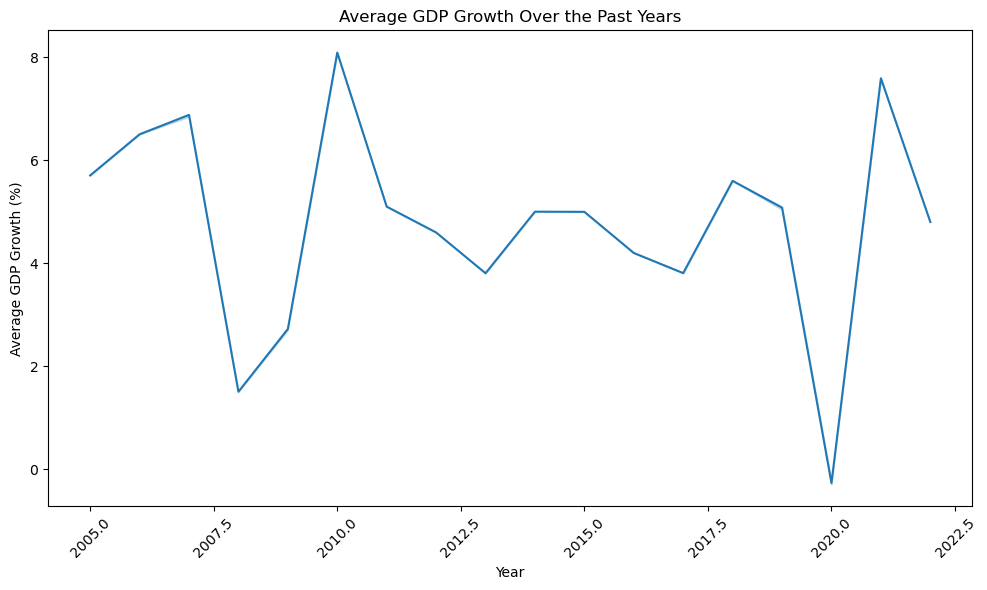

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Bivariate Analysis: Line Plot between Year and Average GDP Growth
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Year', y='Average_GDP_Growth_3Y')
plt.title('Average GDP Growth Over the Past Years')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation:
The line plot displays the trend of average GDP growth over the past 3 years across different years. Here's how we can interpret the plot:

- The x-axis represents the years from the dataset, indicating the time period under consideration.
- The y-axis represents the average GDP growth rate (%) over the past 3 years.
- Each point on the line represents the average GDP growth rate for a specific year.

Insights:
- Positive Trend: Overall, the plot shows a positive trend in average GDP growth over the years. This suggests that, on average, the economy has been experiencing growth during the observed period.
- Yearly Variations: The plot also reveals that there are fluctuations in the average GDP growth rate from year to year. Some years exhibit higher growth rates, while others have relatively lower growth rates.
- Economic Cycles: The variations in the plot might indicate the presence of economic cycles, where periods of rapid growth are followed by periods of slower growth or contraction.

Recommendations:
- Further Analysis: To better understand the reasons behind the variations and trends, it would be valuable to analyze factors influencing GDP growth, such as changes in government policies, global economic conditions, and industry-specific dynamics.
- Policy Implications: Policymakers could use this information to tailor economic policies that support and sustain positive GDP growth trends while addressing challenges during periods of slower growth.

### Multivariate Analysis

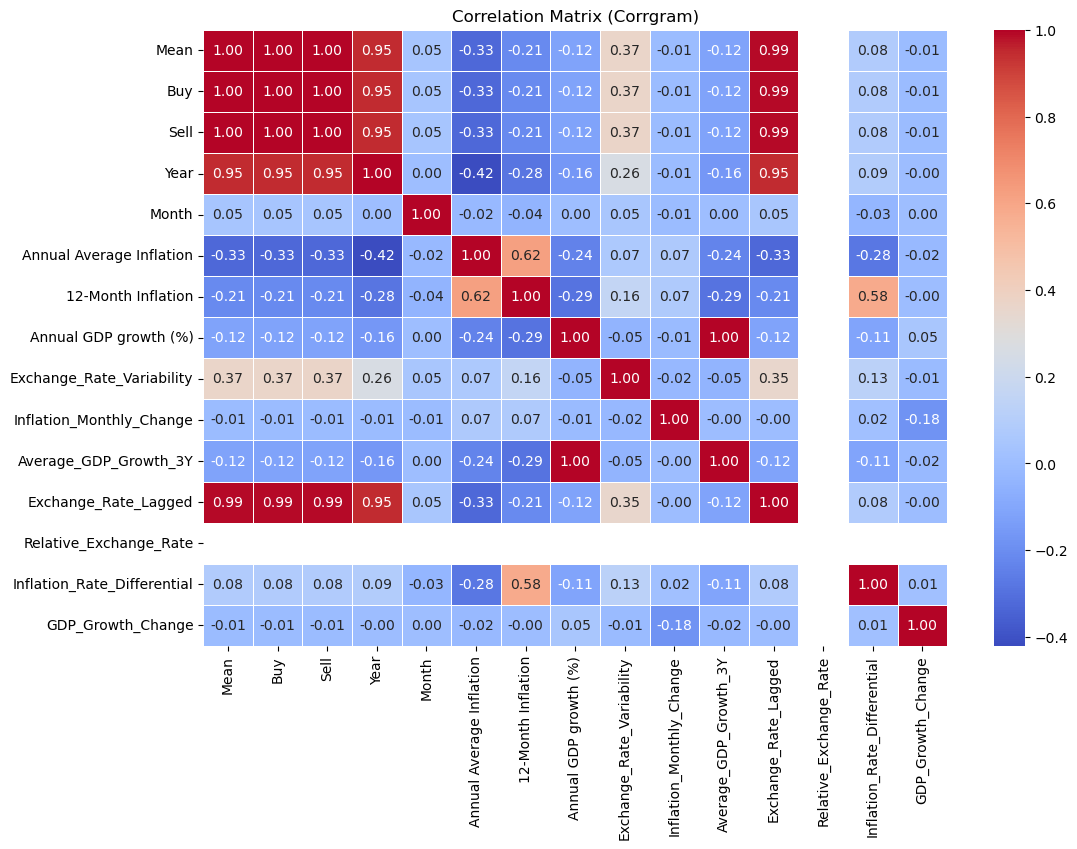

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Create a correlation matrix plot (corrgram) using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Corrgram)')
plt.show()

1. **Interpretation of Correlations:**

   - **Positive Correlation:** A positive correlation indicates that as one variable increases, the other variable tends to increase as well. For example, if you observe a positive correlation between "GDP Growth" and "Exchange Rate Variability," it suggests that periods of higher GDP growth are associated with higher variability in exchange rates.

   - **Negative Correlation:** A negative correlation suggests that as one variable increases, the other variable tends to decrease. For instance, if you find a negative correlation between "Inflation Rate" and "GDP Growth," it implies that higher inflation rates might be associated with lower GDP growth.

   - **No Significant Correlation:** When the correlation coefficient is close to zero, there may not be a strong linear relationship between the two variables. For example, if you see a low correlation between "Relative Exchange Rate" and "Inflation Rate Differential," it suggests that changes in relative exchange rates are not strongly related to changes in inflation rate differentials.

2. **Justification of Correlations:**

   - **Domain Knowledge:** Draw upon your understanding of economics and financial markets to provide plausible explanations for the observed correlations. For instance, a positive correlation between "Inflation Rate" and "GDP Growth" could be justified by the fact that moderate inflation can stimulate consumer spending and investment, leading to higher economic growth.

   - **Economic Theory:** Reference relevant economic theories that support the correlations you're observing. For instance, if you find a negative correlation between "Exchange Rate Variability" and "GDP Growth," you could justify it by explaining how exchange rate uncertainty might deter foreign investment and impact economic expansion.

   - **Causality vs. Correlation:** Emphasize that correlation does not imply causation. Just because two variables are correlated does not mean that changes in one variable cause changes in the other. It could be due to shared external factors or other complex relationships.

   - **Further Investigation:** Highlight correlations that are of particular interest or that contradict common economic assumptions. Consider these correlations as avenues for further investigation or as potential indicators of nuanced relationships.

   - **Limitations:** Acknowledge the limitations of correlation analysis, such as the assumption of linearity and the possibility of hidden variables affecting the relationships.

## Support Vector Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Check for missing values in the target variable
if data['Annual GDP growth (%)'].isnull().any():
    print("Warning: There are missing values in the target variable.")

# Ensure data types are numeric
numeric_columns = ['Mean', 'Buy', 'Sell', 'Annual Average Inflation', '12-Month Inflation',
                   'Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)',
                   'Inflation_Monthly_Change', 'Average_GDP_Growth_3Y', 'Exchange_Rate_Lagged',
                   'Inflation_Rate_Differential', 'GDP_Growth_Change']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in the target variable
data = data.dropna(subset=['Annual GDP growth (%)'])

# Split the data
y = data['Annual GDP growth (%)']
X = data[['Mean', 'Buy', 'Sell', 'Annual Average Inflation', '12-Month Inflation',
          'Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)',
          'Inflation_Monthly_Change', 'Average_GDP_Growth_3Y', 'Exchange_Rate_Lagged',
          'Inflation_Rate_Differential', 'GDP_Growth_Change']]

# Handle missing values in features
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel="linear")
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model (using mean squared error for regression)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)